In [12]:
from music21 import converter
from music21 import stream, note, interval
import pandas as pd
import music_utils as mu
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import music_utils as mu
folder_path = "./Bach Sheet Music/"

all_intervals = []
all_prev_notes = []

mu.get_notes(all_intervals, all_prev_notes, folder_path)


In [3]:
df = pd.DataFrame({'Note': all_prev_notes, 'Interval': all_intervals})

for row in df.itertuples():
    if row.Note.startswith('AA') or row.Note.startswith('dd') or row.Note.startswith('P0'):
        df.drop(row.Index, inplace=True)

df_wide = df.pivot_table(index='Note', columns='Interval', aggfunc='size', fill_value=0)
print(df_wide.shape)
df_wide.head(20)

(33, 27)


Interval,A1,A2,A4,A5,A6,M2,M3,M5,M6,M7,...,d3,d4,d5,d7,m-2,m2,m3,m5,m6,m7
Note,,,,,,,,,,,,,,,,,,,,,
A1,0,2,9,0,0,94,8,0,14,0,...,0,1,5,0,0,62,33,0,5,3
A2,2,0,2,0,0,140,41,0,11,0,...,0,1,7,1,0,94,28,0,9,4
A3,1,0,3,0,0,122,20,0,11,0,...,0,1,9,1,0,70,43,0,6,11
A4,0,3,10,0,0,165,45,0,19,1,...,0,0,14,8,0,142,69,1,28,5
A5,3,5,6,0,0,168,43,0,13,0,...,0,0,4,4,0,114,67,0,17,8
A6,5,1,7,1,0,156,36,0,17,3,...,1,1,8,2,0,111,78,1,17,11
A7,1,0,0,1,0,74,25,1,15,0,...,0,0,3,0,0,59,32,0,3,4
A8,0,2,9,0,0,72,15,0,9,0,...,0,1,12,0,0,67,18,0,4,9
M1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='Note'>

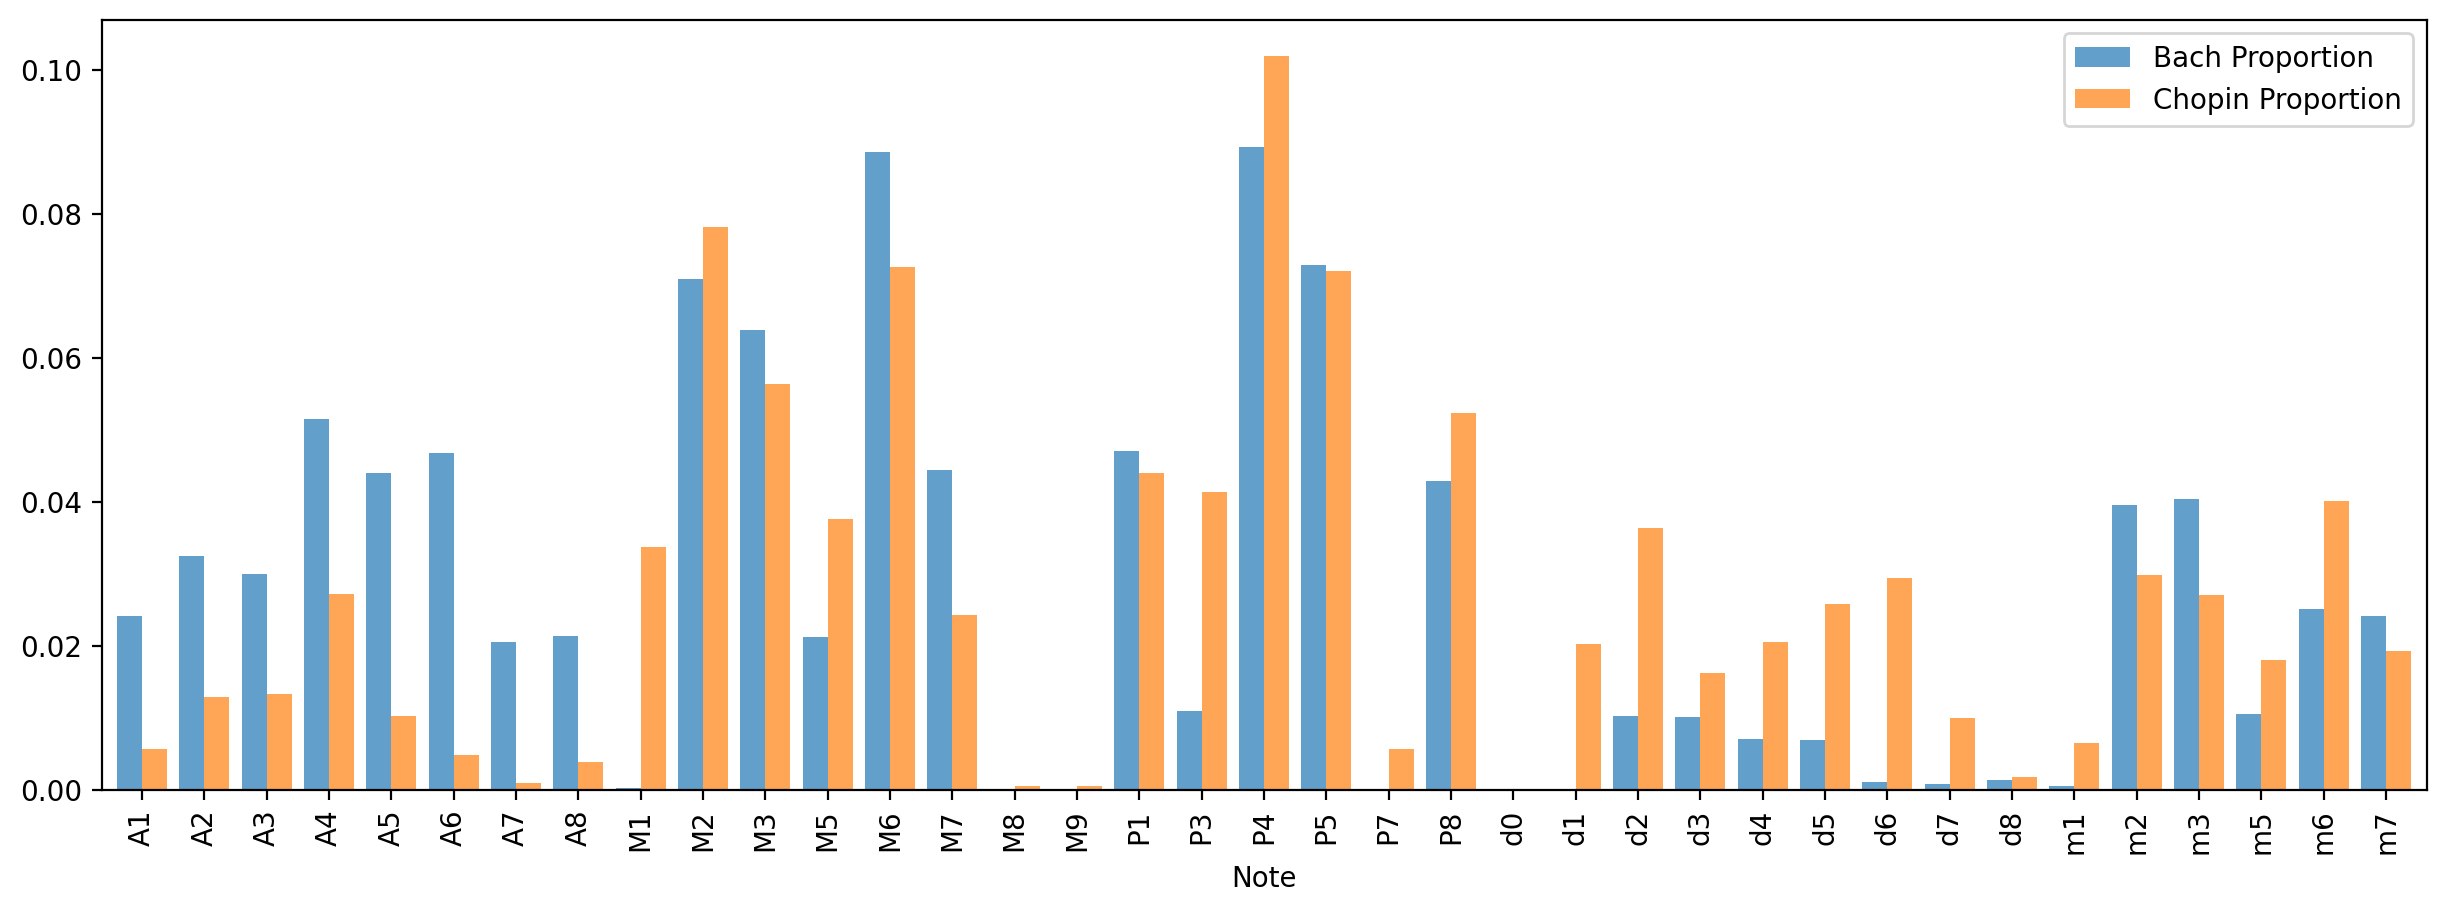

In [4]:
row_sums = df_wide.iloc[:, :].sum(axis=1)
total_sum = row_sums.sum()
row_sums_proportions = row_sums / total_sum
df_graph = pd.DataFrame(row_sums_proportions, columns=['Bach Proportion'])
#df_graph.plot(kind='bar', y = 'Proportion',figsize=(15, 5))

df_chopin = pd.read_csv('chopin.csv')
df_chopin.rename(columns={'Proportion': 'Chopin Proportion'}, inplace=True)


df2 = pd.merge(df_graph, df_chopin, on='Note', how='outer')
df2.fillna(0, inplace=True)

df2.set_index('Note', inplace=True)
df2.plot(kind='bar', y = ['Bach Proportion', 'Chopin Proportion'], alpha = 0.7, width = 0.8, figsize=(15, 5))

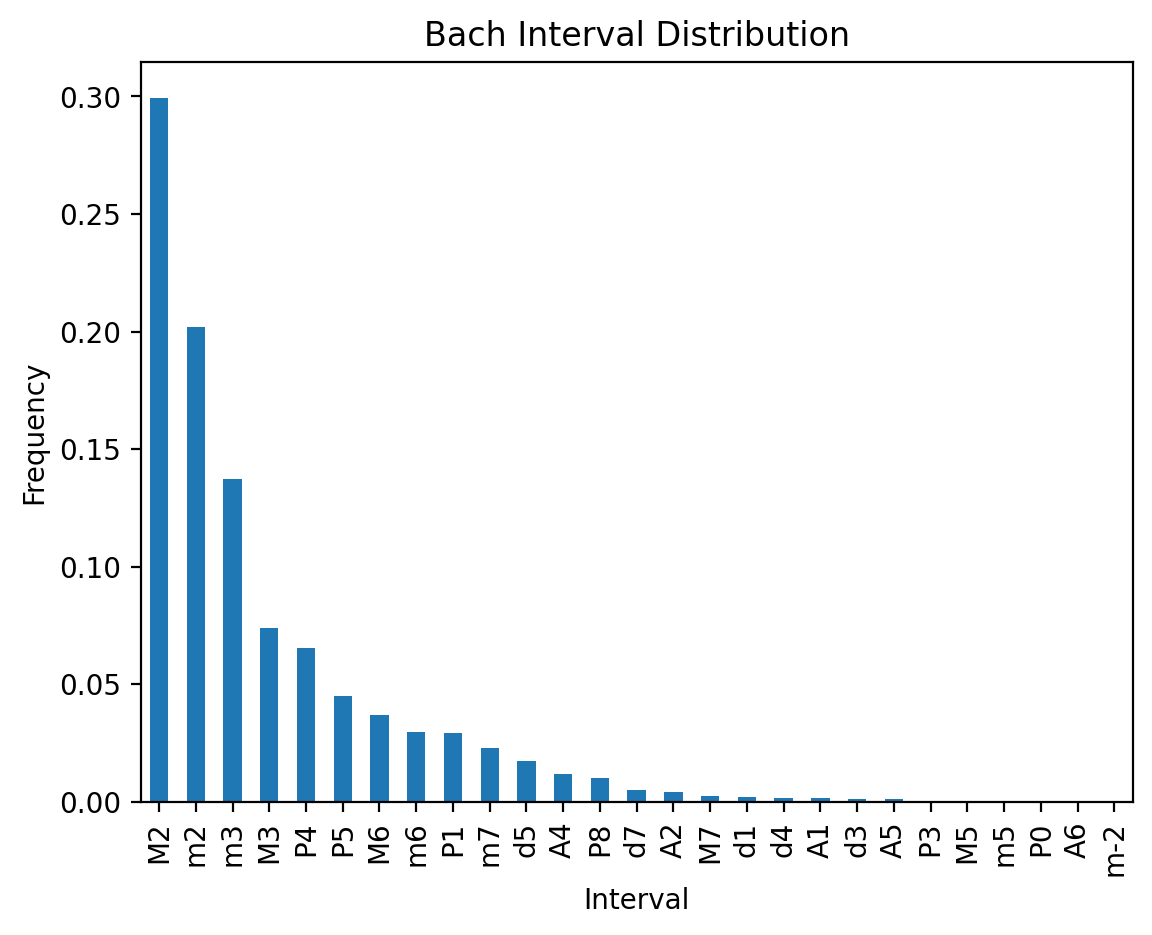

In [5]:
df['Interval'].value_counts(normalize = True).plot(kind='bar')

plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Bach Interval Distribution')
plt.show()



In [6]:
df_wide.iloc[:, :] = df_wide.iloc[:, :].div(row_sums, axis=0)
df_wide.head(15)

/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_18131/1785951967.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Note
A1    0.000000
A2    0.005236
A3    0.002841
A4    0.000000
A5    0.005803
A6    0.009091
A7    0.004132
A8    0.000000
M1    0.000000
M2    0.001199
M3    0.000000
M5    0.000000
M6    0.001918
M7    0.000000
P1    0.000000
P3    0.007812
P4    0.000000
P5    0.000000
P8    0.000000
d0    0.000000
d2    0.000000
d3    0.000000
d4    0.000000
d5    0.000000
d6    0.000000
d7    0.000000
d8    0.000000
m1    0.000000
m2    0.000000
m3    0.000000
m5    0.000000
m6    0.000000
m7    0.000000
Name: A1, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_wide.iloc[:, :] = df_wide.iloc[:, :].div(row_sums, axis=0)
/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_18131/1785951967.py:1: FutureWarning: Setting an item of incompa

Interval,A1,A2,A4,A5,A6,M2,M3,M5,M6,M7,...,d3,d4,d5,d7,m-2,m2,m3,m5,m6,m7
Note,,,,,,,,,,,,,,,,,,,,,
A1,0.000000,0.007042,0.031690,0.000000,0.000000,0.330986,0.028169,0.000000,0.049296,0.000000,...,0.000000,0.003521,0.017606,0.000000,0.0,0.218310,0.116197,0.000000,0.017606,0.010563
A2,0.005236,0.000000,0.005236,0.000000,0.000000,0.366492,0.107330,0.000000,0.028796,0.000000,...,0.000000,0.002618,0.018325,0.002618,0.0,0.246073,0.073298,0.000000,0.023560,0.010471
A3,0.002841,0.000000,0.008523,0.000000,0.000000,0.346591,0.056818,0.000000,0.031250,0.000000,...,0.000000,0.002841,0.025568,0.002841,0.0,0.198864,0.122159,0.000000,0.017045,0.031250
A4,0.000000,0.004950,0.016502,0.000000,0.000000,0.272277,0.074257,0.000000,0.031353,0.001650,...,0.000000,0.000000,0.023102,0.013201,0.0,0.234323,0.113861,0.001650,0.046205,0.008251
A5,0.005803,0.009671,0.011605,0.000000,0.000000,0.324952,0.083172,0.000000,0.025145,0.000000,...,0.000000,0.000000,0.007737,0.007737,0.0,0.220503,0.129594,0.000000,0.032882,0.015474
A6,0.009091,0.001818,0.012727,0.001818,0.000000,0.283636,0.065455,0.000000,0.030909,0.005455,...,0.001818,0.001818,0.014545,0.003636,0.0,0.201818,0.141818,0.001818,0.030909,0.020000
A7,0.004132,0.000000,0.000000,0.004132,0.000000,0.305785,0.103306,0.004132,0.061983,0.000000,...,0.000000,0.000000,0.012397,0.000000,0.0,0.243802,0.132231,0.000000,0.012397,0.016529
A8,0.000000,0.007968,0.035857,0.000000,0.000000,0.286853,0.059761,0.000000,0.035857,0.000000,...,0.000000,0.003984,0.047809,0.000000,0.0,0.266932,0.071713,0.000000,0.015936,0.035857
M1,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000


In [7]:
row_names = df_wide.index.tolist()
note_chain = mu.conversions('C', df_wide, 25, row_names)
note_chain

['C',
 'D-',
 'E-',
 'G',
 'B-',
 'C',
 'D-',
 'E-',
 'F',
 'E-',
 'A-',
 'C-',
 'F-',
 'G-',
 'A--',
 'B---',
 'G---',
 'C---',
 'F---',
 'G----',
 'C----',
 'B',
 'C',
 'D',
 'E',
 'F#']

In [8]:
all_rhythm = []
all_prev_rhythm = []

mu.get_rhythms(all_rhythm, all_prev_rhythm, folder_path)


In [9]:
df_rhythm = pd.DataFrame({'Rhythm': all_prev_rhythm, 'Next Rhythm': all_rhythm})

df_wide_rhythm = df_rhythm.pivot_table(index='Rhythm', columns='Next Rhythm', aggfunc='size', fill_value=0)
print(df_wide_rhythm.shape)
df_wide_rhythm.head(30)

(17, 17)


Next Rhythm,0,1/12,0.125,1/6,0.25,1/3,0.375,0.5,0.75,1.0,1.5,2.0,3.0,4.0,4.5,6.0,8.0
Rhythm,,,,,,,,,,,,,,,,,
0.0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
1/12,0,32,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0
0.125,2,0,631,1,91,0,7,25,18,1,3,0,0,0,0,0,0
1/6,1,0,2,931,12,2,0,15,0,1,0,1,0,0,0,0,0
0.25,15,1,100,5,8794,0,0,431,80,71,31,8,0,1,0,0,0
1/3,0,0,0,2,0,78,0,0,1,5,1,2,0,0,0,0,0
0.375,0,0,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0.5,10,0,14,21,439,1,0,1700,1,129,31,13,2,5,0,0,0
0.75,4,11,14,0,74,0,0,6,24,11,2,1,0,0,0,0,0


In [10]:
'''import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Define the transition matrix
P = df_wide_rhythm.to_numpy()
#P = np.delete(P,0, axis = 1)
P = np.round(P, 3)
print(P.shape)

# Create a directed graph
G = nx.DiGraph()

# Add nodes (states)
states = [0.0, '1/12',0.125,'1/6',0.25,'1/3',0.375,0.5,0.75,1.0,1.5,2.0,3.0,4.0,4.5,6.0,8.0]
G.add_nodes_from(states)

# Add edges (transitions)
for i, row in enumerate(P):
    for j, prob in enumerate(row):
         if prob > 0:
              G.add_edge(states[i], states[j], weight=prob)

# Draw the graph
pos = nx.spring_layout(G, k=10)  # Increase the value of k to spread out the plot more
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()'''


"import networkx as nx\nimport networkx as nx\nimport matplotlib.pyplot as plt\nimport matplotlib.pyplot as plt\n\n# Define the transition matrix\nP = df_wide_rhythm.to_numpy()\n#P = np.delete(P,0, axis = 1)\nP = np.round(P, 3)\nprint(P.shape)\n\n# Create a directed graph\nG = nx.DiGraph()\n\n# Add nodes (states)\nstates = [0.0, '1/12',0.125,'1/6',0.25,'1/3',0.375,0.5,0.75,1.0,1.5,2.0,3.0,4.0,4.5,6.0,8.0]\nG.add_nodes_from(states)\n\n# Add edges (transitions)\nfor i, row in enumerate(P):\n    for j, prob in enumerate(row):\n         if prob > 0:\n              G.add_edge(states[i], states[j], weight=prob)\n\n# Draw the graph\npos = nx.spring_layout(G, k=10)  # Increase the value of k to spread out the plot more\nnx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')\nedge_labels = nx.get_edge_attributes(G, 'weight')\nnx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)\nplt.show()"

In [11]:
row_sums = df_wide_rhythm.iloc[:, :].sum(axis=1)
total_sum = row_sums.sum()
row_sums_proportions = row_sums / total_sum
df_plot_rhythm = pd.DataFrame(row_sums_proportions, columns=['Bach Proportion'])
#df_plot_rhythm.index = df_plot_rhythm.index.astype('str')

df_chopin_rhythm = pd.read_csv('chopin_rhythm.csv')
df_chopin_rhythm.rename(columns={'Proportion': 'Chopin Proportion'}, inplace=True)

df2_rhythm = pd.merge(df_plot_rhythm, df_chopin_rhythm, on='rhythm', how='outer')
df2_rhythm.fillna(0, inplace=True)

df2_rhythm.set_index('rhythm', inplace=True)
df2_rhythm.plot(kind='bar', y = ['Bach Proportion', 'Chopin Proportion'], alpha = 0.7, width = 0.8, figsize=(15, 5))


KeyError: 'rhythm'

In [ ]:
#df_chopin_rhythm.index = df_chopin_rhythm.index.astype('object')  
#pd.merge(df_plot_rhythm, df_chopin_rhythm, on='rhythm', how='outer')
df_plot_rhythm.index  


Index(['0.0', '1/12', '0.125', '1/6', '0.25', '1/3', '0.375', '0.5', '0.75',
       '1.0', '1.5', '2.0', '3.0', '4.0', '4.5', '6.0', '8.0'],
      dtype='object', name='Rhythm')

In [ ]:
df_wide_rhythm.iloc[:, :] = df_wide_rhythm.iloc[:, :].div(row_sums, axis=0)
row_names_rhythm = df_wide_rhythm.index.tolist()
df_wide_rhythm.head(15)

/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_36932/3629646307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Rhythm
0.0      0.000000
1/12     0.000000
0.125    0.002567
1/6      0.001036
0.25     0.001573
1/3      0.000000
0.375    0.000000
0.5      0.004227
0.75     0.027211
1.0      0.002817
1.5      0.064935
2.0      0.025641
3.0      0.000000
4.0      0.129032
4.5      0.000000
6.0      0.250000
8.0      0.000000
Name: 0, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_wide_rhythm.iloc[:, :] = df_wide_rhythm.iloc[:, :].div(row_sums, axis=0)
/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_36932/3629646307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Rhythm
0.0      0.142857
1/12     0.666667
0.125    0.000000
1/6      0.000000
0.25     0.000105


Next Rhythm,0,1/12,0.125,1/6,0.25,1/3,0.375,0.5,0.75,1.0,1.5,2.0,3.0,4.0,4.5,6.0,8.0
Rhythm,,,,,,,,,,,,,,,,,
0.0,0.000000,0.142857,0.000000,0.000000,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/12,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.125,0.002567,0.000000,0.810013,0.001284,0.116816,0.000000,0.008986,0.032092,0.023107,0.001284,0.003851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/6,0.001036,0.000000,0.002073,0.964767,0.012435,0.002073,0.000000,0.015544,0.000000,0.001036,0.000000,0.001036,0.000000,0.000000,0.000000,0.000000,0.000000
0.25,0.001573,0.000105,0.010485,0.000524,0.922093,0.000000,0.000000,0.045192,0.008388,0.007445,0.003250,0.000839,0.000000,0.000105,0.000000,0.000000,0.000000
1/3,0.000000,0.000000,0.000000,0.022472,0.000000,0.876404,0.000000,0.000000,0.011236,0.056180,0.011236,0.022472,0.000000,0.000000,0.000000,0.000000,0.000000
0.375,0.000000,0.000000,0.714286,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.004227,0.000000,0.005917,0.008876,0.185545,0.000423,0.000000,0.718512,0.000423,0.054522,0.013102,0.005495,0.000845,0.002113,0.000000,0.000000,0.000000
0.75,0.027211,0.074830,0.095238,0.000000,0.503401,0.000000,0.000000,0.040816,0.163265,0.074830,0.013605,0.006803,0.000000,0.000000,0.000000,0.000000,0.000000


(17, 17)


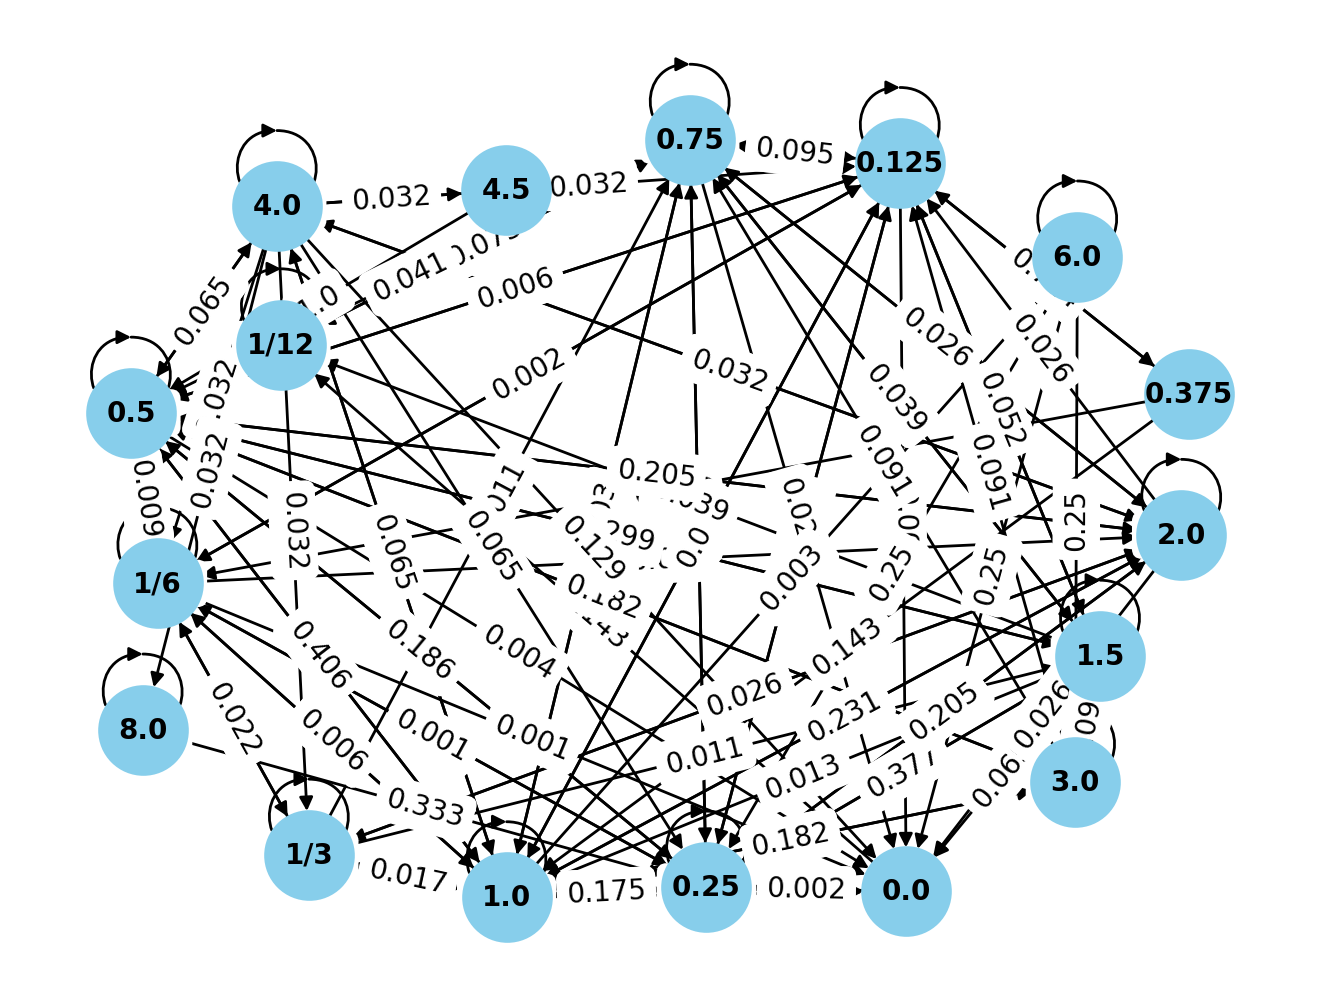

In [ ]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Define the transition matrix
P = df_wide_rhythm.to_numpy()
#P = np.delete(P,0, axis = 1)
P = np.round(P, 3)
print(P.shape)

# Create a directed graph
G = nx.DiGraph()

# Add nodes (states)
states = [0.0, '1/12',0.125,'1/6',0.25,'1/3',0.375,0.5,0.75,1.0,1.5,2.0,3.0,4.0,4.5,6.0,8.0]
G.add_nodes_from(states)

# Add edges (transitions)
for i, row in enumerate(P):
    for j, prob in enumerate(row):
         if prob > 0:
              G.add_edge(states[i], states[j], weight=prob)

# Draw the graph
pos = nx.spring_layout(G, k=10)  # Increase the value of k to spread out the plot more
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [ ]:
rhythm_chain = mu.simulate_MC2(1.0, df_wide_rhythm, row_names_rhythm, 30)
rhythm_chain

[1.0,
 1.0,
 0.5,
 0.25,
 0.25,
 0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25]

In [ ]:
stream1 = stream.Stream()
count = note_chain.__len__()

for i in range(count):
    if stream1.measureNumber == 4:
        break
    n = note.Note(note_chain[i])
    n.duration.quarterLength = rhythm_chain[i]
    stream1.append(n)

stream1.show()

stream1.show('midi')

MusicXMLExportException: In part (None), measure (1): Cannot convert durations without types to MusicXML.